In [1]:
# 0 - layer_density
cuboid_points = [
    (0.0, 0.0, 0.0),
    (1.0, 0.0, 0.0),
    (2.0, 0.0, 0.0),
    (3.0, 0.0, 0.0),
    (4.0, 0.0, 0.0),
    (5.0, 0.0, 0.0),
    (5.0, 1.0, 0.0),
    (5.0, 2.0, 0.0),
    (5.0, 3.0, 0.0),
    (5.0, 4.0, 0.0),
    (5.0, 5.0, 0.0),
    (4.0, 5.0, 0.0),
    (3.0, 5.0, 0.0),
    (2.0, 5.0, 0.0),
    (1.0, 5.0, 0.0),
    (0.0, 5.0, 0.0),
    (0.0, 4.0, 0.0),
    (0.0, 3.0, 0.0),
    (0.0, 2.0, 0.0),
    (0.0, 1.0, 0.0),
]




In [2]:
import numpy as np

LAYER_SPACING = 0.5

points_per_layer = len(cuboid_points)

depth = 15.0

for k in range(int(depth / LAYER_SPACING)):
    for i in range(points_per_layer):
        cuboid_points.append((cuboid_points[i][0], cuboid_points[i][1], (k + 1) * LAYER_SPACING))

faces = []


i=0
while i + points_per_layer + 1 < len(cuboid_points):
    faces.append([i, i + points_per_layer + 1, i + 1])
    faces.append([i, i + points_per_layer, i + points_per_layer + 1])
    i += 1

# Cap off the ends

# left face

left_edge = list(range(0, points_per_layer))

left_edge.reverse()

left_outer_point = (0.0, 0.0, -LAYER_SPACING)
right_outer_point = (0.0, 0.0, depth + LAYER_SPACING)



cuboid_points.append(left_outer_point)  # i=-2
cuboid_points.append(right_outer_point)  # i=-1

for i in range(points_per_layer):
    faces.append((i, i+1, len(cuboid_points) - 2))
    faces.append((len(cuboid_points) - 3 - i, len(cuboid_points) - 4 - i, len(cuboid_points) - 1))


In [3]:
print(faces)
len(cuboid_points)

[[0, 21, 1], [0, 20, 21], [1, 22, 2], [1, 21, 22], [2, 23, 3], [2, 22, 23], [3, 24, 4], [3, 23, 24], [4, 25, 5], [4, 24, 25], [5, 26, 6], [5, 25, 26], [6, 27, 7], [6, 26, 27], [7, 28, 8], [7, 27, 28], [8, 29, 9], [8, 28, 29], [9, 30, 10], [9, 29, 30], [10, 31, 11], [10, 30, 31], [11, 32, 12], [11, 31, 32], [12, 33, 13], [12, 32, 33], [13, 34, 14], [13, 33, 34], [14, 35, 15], [14, 34, 35], [15, 36, 16], [15, 35, 36], [16, 37, 17], [16, 36, 37], [17, 38, 18], [17, 37, 38], [18, 39, 19], [18, 38, 39], [19, 40, 20], [19, 39, 40], [20, 41, 21], [20, 40, 41], [21, 42, 22], [21, 41, 42], [22, 43, 23], [22, 42, 43], [23, 44, 24], [23, 43, 44], [24, 45, 25], [24, 44, 45], [25, 46, 26], [25, 45, 46], [26, 47, 27], [26, 46, 47], [27, 48, 28], [27, 47, 48], [28, 49, 29], [28, 48, 49], [29, 50, 30], [29, 49, 50], [30, 51, 31], [30, 50, 51], [31, 52, 32], [31, 51, 52], [32, 53, 33], [32, 52, 53], [33, 54, 34], [33, 53, 54], [34, 55, 35], [34, 54, 55], [35, 56, 36], [35, 55, 56], [36, 57, 37], [36, 5

622

""

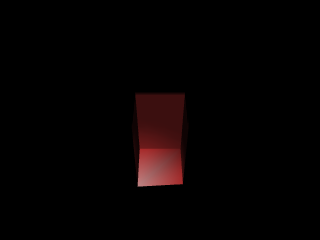

In [4]:
from glider.vehicle import Vehicle

vehicle = Vehicle(
    vertices=cuboid_points,
    faces=faces,
    max_dim_m=10,
)

vehicle.show()

In [5]:
from glider.optimization import drop_test_glider

world_xml = drop_test_glider(
    *vehicle.create_glider_from_vertices(),

    )

with open('world.xml', 'w') as f:
    f.write(world_xml)

In [6]:
from glider.optimization import iterate_population, fitness_func
from glider.visualize import view_vehicle
from glider.vehicle import Vehicle

frames = []


population = [
    Vehicle(
        vertices=cuboid_points,
        faces=faces,
        orientation=[90,180,-20],
    ) for _ in range(100)] 

for i in range(100):
    population = iterate_population(
        population,
        survival_weight = 0.5,
        cloning_weight = 0.5,
    )

    if i % 10 == 0:
        print("Iteration:", i)
        winning_glider = population[0]
        print("Fitness:", fitness_func(winning_glider))
        # vehicle.Vehicle(vertices=winning_genes).show()
        frames.append(view_vehicle(*winning_glider.create_glider_from_vertices()))

Iteration: 0
Fitness: 2.0780678668415082
Iteration: 10
Fitness: 2.486413013724432
Iteration: 20
Fitness: 2.486413013724432
Iteration: 30
Fitness: 2.486413013724432
Iteration: 40
Fitness: 2.486413013724432
Iteration: 50
Fitness: 2.486413013724432
Iteration: 60
Fitness: 2.486413013724432
Iteration: 70
Fitness: 2.486413013724432
Iteration: 80
Fitness: 2.486413013724432
Iteration: 90
Fitness: 2.486413013724432


In [7]:
import mediapy as media

media.show_video(frames, fps=2)

In [8]:
print(population[0])

In [9]:
world_xml = drop_test_glider(*population[0].create_glider_from_vertices())

In [10]:
with open('./world.xml', 'w') as f:
    f.write(world_xml)